In [22]:
import matplotlib.pyplot as plot
import csv
import numpy as np
import random
import scipy

confidence_level = 0.90
z_value = scipy.stats.norm.ppf((1 + confidence_level) / 2)

In [23]:
# One
pod = []
container = []
process = []

In [24]:
mean_pod = []
std_pod = []
mean_process = []
std_process = []
mean_container = []
std_container = []

In [15]:
import numpy as np

files = "/home/kien/kiem/serverless-giang/data/benchmarking/benchmarking_score.csv"
file_type = ["pod", "container", "process"]
multiple_pod = []
multiple_container = []
multiple_process = []
count = 1


with open(files, 'r') as file:
    for line in file:
        multiple_pod.append(line.strip())

print(multiple_pod)

temp = []

for i in multiple_pod:
    if "-" in i:
        mean_pod.append(np.mean(temp))
        std_pod.append(np.std(temp) / np.sqrt(len(temp)))
        temp.clear()
    else:
        temp.append(float(i))
    
mean_pod.append(np.mean(temp))
std_pod.append(np.std(temp) / np.sqrt(len(temp)))

print(mean_pod)
print(std_pod)


['36.676', '41.016', '64.539', '37.005', '16.713', '16.902', '16.897', '16.827', '49.024', '---', '38.858', '38.993', '50.856', '50.824', '23.053', '28.73', '52.12', '41.275', '39.378', '---', '54.685', '53.728', '53.449', '54.595', '54.063', '53.462', '69.225', '53.594', '66.19', '----', '26.292', '37.222', '49.746', '39.02', '38.725', '28.093', '50.471', '40.466', '50.978', '---', '42.13', '76.104', '66.614', '85.578', '41.766', '74.455', '55.629', '55.924', '65.397', '----', '60.793', '42.237', '41.763', '42.688', '64.146', '41.811', '41.959', '41.777', '53.972']
[32.84433333333334, 40.45411111111111, 56.998999999999995, 40.11255555555555, 62.6218888888889, 47.905111111111104]
[5.432359349193078, 3.1399351076271844, 1.9280572964182372, 2.86579487222255, 4.741540733716463, 2.8841643565624504]


In [13]:
numbers = [60.793, 42.237, 41.763, 42.688, 64.146, 41.811, 41.959, 41.777, 53.972]
print(np.mean(numbers))

47.905111111111104


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


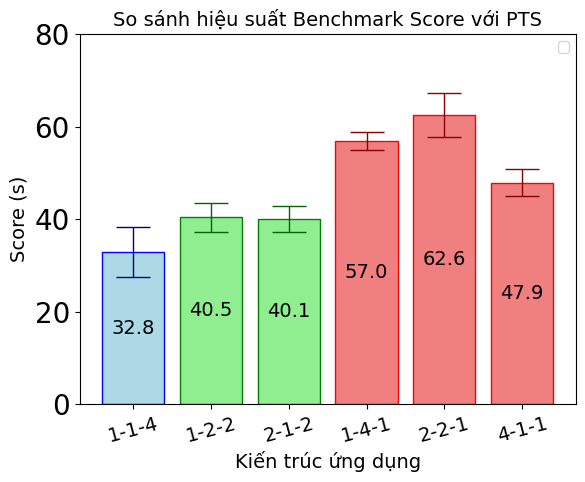

In [157]:
import numpy as np
import matplotlib.pyplot as plt

# Benchmarking score
case_1 = [32.84433333333334, 40.45411111111111, 40.11255555555555, 56.998999999999995, 62.6218888888889, 47.905111111111104]
std = [5.432359349193078, 3.1399351076271844, 2.86579487222255, 1.9280572964182372, 4.741540733716463, 2.8841643565624504]

state = ["1-1-4", "1-2-2", "2-1-2", "1-4-1", "2-2-1", "4-1-1"]

# Define colors for each group
colors = ['lightblue', 'lightgreen', 'lightcoral']

fig1, ax1 = plt.subplots()
x_pos = np.arange(len(state))

# Group bars and assign colors
for i in range(len(state)):
    if state[i] == "1-1-4":
        color = 'lightblue'
        ecolor = "blue"
        error_color = "darkblue"
    elif state[i] in ["1-2-2", "2-1-2"]:
        color = 'lightgreen'
        ecolor = "green"
        error_color = "darkgreen"
    else:
        color = 'lightcoral'
        ecolor = "red"
        error_color = "darkred"
    
    # Bar plot
    bar = ax1.bar(i, case_1[i], yerr=std[i], align='center', alpha=1, edgecolor=ecolor, capsize=12, color=color, error_kw=dict(ecolor=error_color, lw=1))

    # Add text labels on each bar
    ax1.text(bar[0].get_x() + bar[0].get_width() / 2, bar[0].get_height() / 2, f"{case_1_final[i]}", ha='center', va='center', fontsize=14, color='black')

ax1.set_ylabel("Score (s)", fontsize=14)
ax1.set_xlabel("Kiến trúc ứng dụng", fontsize=14)

ax1.set_xticks(x_pos)
ax1.set_xticklabels(state, rotation=15, fontsize=14)

ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.set_xticklabels(state, fontsize = 14)
ax1.set_ylim(0, 80)

plt.title("So sánh hiệu suất Benchmark Score với PTS", fontsize=14)

plt.savefig('../pdf/power-states.pdf', bbox_inches='tight')


import matplotlib.patches as mpatches

# Create legend handles
handles = [mpatches.Patch(color='lightblue', label='1-1-4'),
           mpatches.Patch(color='lightgreen', label='1-2-2, 2-1-2'),
           mpatches.Patch(color='lightcoral', label='1-4-1, 2-2-1, 4-1-1')]

# Add legend to the plot
plt.legend(handles=handles)


plt.show()


In [25]:
# New, using for time complete
import numpy as np

def process_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(line.strip())

    temp = []
    mean_list = []
    std_list = []

    for i in data:
        if "-" in i:
            mean_list.append(np.mean(temp))
            std_list.append(np.std(temp) / np.sqrt(len(temp)))
            temp.clear()
        else:
            temp.append(float(i))

    return mean_list, std_list

files = "/home/kien/kiem/serverless-giang/data/complete_time/mec/multiple_{}/storage_multiple_{}.csv"
file_types = ["pod", "container", "process"]

mean_std_dict = {}

for file_type in file_types:
    file_path = files.format(file_type, file_type)
    mean_list, std_list = process_file(file_path)
    mean_std_dict[f"mean_{file_type}"] = mean_list
    mean_std_dict[f"std_{file_type}"] = std_list

# Extracting individual lists for printing
mean_pod = mean_std_dict["mean_pod"]
std_pod = mean_std_dict["std_pod"]
mean_container = mean_std_dict["mean_container"]
std_container = mean_std_dict["std_container"]
mean_process = mean_std_dict["mean_process"]
std_process = mean_std_dict["std_process"]

# Print results
print(mean_pod)
print(std_pod)
print(mean_container)
print(std_container)
print(mean_process)
print(std_process)


[235.1821499347687, 239.91578297615052, 262.78523979187014, 293.68340492248535, 337.0646349430084, 411.36214952468873]
[0.6818395457228055, 0.4839774973114327, 1.3653281055924036, 1.332232422705208, 0.5661876909797543, 0.9273467862476312]
[233.4588150024414, 241.87221179008483, 267.8213492393494, 287.97322354316714, 340.3252049922943, 411.554966878891]
[0.9587707121003003, 0.5778734360447548, 3.806430394559374, 2.2842296693202666, 1.1442008398279129, 1.11039037331435]
[234.0375750541687, 240.7879529953003, 260.8677520751953, 291.0269936561584, 335.25865588188174, 407.86259746551514]
[0.95933156213484, 0.7530072890861841, 1.0658177153441208, 2.1947487132305805, 0.9020411177398574, 0.6639901213568681]


In [20]:
import numpy as np

files = "/home/kien/kiem/serverless-giang/data/complete_time/mec/multiple_{}/storage_multiple_{}.csv"
file_type = ["pod", "container", "process"]
multiple_pod = []
multiple_container = []
multiple_process = []
count = 1

for type in file_type:
    file_multiple = files.format(type, type)

    if count == 1: 
        with open(file_multiple, 'r') as file:
            for line in file:
                multiple_pod.append(line.strip())

        multiple_pod = multiple_pod[:-1]

        temp = []

        for i in multiple_pod:
            if "-" in i:
                mean_pod.append(np.mean(temp))
                std_pod.append(np.std(temp) / np.sqrt(len(temp)))
                temp.clear()
            else:
                temp.append(float(i))
        count = count + 1
    elif count == 2:
        with open(file_multiple, 'r') as file:
            for line in file:
                multiple_container.append(line.strip())

        multiple_container = multiple_container[:-1]

        temp = []

        for i in multiple_container:
            if "-" in i:
                mean_container.append(np.mean(temp))
                std_container.append(np.std(temp) / np.sqrt(len(temp)))
                temp.clear()
            else:
                temp.append(float(i))
        count = count + 1
    else:
        with open(file_multiple, 'r') as file:
            for line in file:
                multiple_process.append(line.strip())

        multiple_process = multiple_process[:-1]

        temp = []

        for i in multiple_process:
            if "-" in i:
                mean_process.append(np.mean(temp))
                std_process.append(np.std(temp) / np.sqrt(len(temp)))
                temp.clear()
            else:
                temp.append(float(i))
        count = count + 1

print(mean_pod)
print(std_pod)
print(mean_container)
print(std_container)
print(mean_process)
print(std_process)

[235.1821499347687, 239.91578297615052, 262.78523979187014, 293.68340492248535, 337.0646349430084]
[0.6818395457228055, 0.4839774973114327, 1.3653281055924036, 1.332232422705208, 0.5661876909797543]
[233.4588150024414, 241.87221179008483, 267.8213492393494, 287.97322354316714, 340.3252049922943]
[0.9587707121003003, 0.5778734360447548, 3.806430394559374, 2.2842296693202666, 1.1442008398279129]
[234.0375750541687, 240.7879529953003, 260.8677520751953, 291.0269936561584, 335.25865588188174]
[0.95933156213484, 0.7530072890861841, 1.0658177153441208, 2.1947487132305805, 0.9020411177398574]


In [18]:
file_name_pod = "/home/kien/kiem/serverless-giang/data/complete_time/mec/multiple_pod/storage_multiple_pod.csv"
file_name_container = "/home/kien/kiem/serverless-giang/data/complete_time/mec/multiple_container/storage_multiple_container.csv"
file_name_process = "/home/kien/kiem/serverless-giang/data/complete_time/mec/multiple_process/storage_multiple_process.csv"

file_list = []
file_list.append(file_name_pod)
file_list.append(file_name_container)
file_list.append(file_name_process)

count = 0
for file_name in file_list:
    with open(file_name, 'r') as file:
        for line in file:
            # Chuyển đổi giá trị từ dạng chuỗi sang số nguyên
            value = (line.strip())
            
            if count == 0:
                # Thêm giá trị vào mảng pod
                pod.append(value)
            if count == 1:
                container.append(value)

            if count == 2:
                process.append(value)\

    count = count +1
            


print(pod)
print(container)
print(process)

['235.37318420410156', '233.99096274375916', '233.66855883598328', '237.97472953796387', '234.90331435203552', '------------------', '239.15413737297058', '239.78621816635132', '240.01472926139832', '241.88279581069946', '238.74103426933289', '------------------', '256.7442407608032', '263.69816613197327', '264.0165786743164', '265.02296328544617', '264.4442501068115', '-----------------', '291.05679297447205', '293.9404594898224', '290.20671224594116', '298.6349778175354', '294.57808208465576', '------------------', '335.1512379646301', '337.00415086746216', '336.29659819602966', '338.4518597126007', '338.41932797431946', '----------------', '407.8793611526489', '412.6739845275879', '414.07867431640625', '411.33456230163574', '410.8441653251648', '-------------']
['233.91082453727722', '235.07011795043945', '235.24906849861145', '233.71725845336914', '229.34680557250977', '-------------------', '243.85396790504456', '242.04609298706055', '242.4007923603058', '240.02565240859985', '241

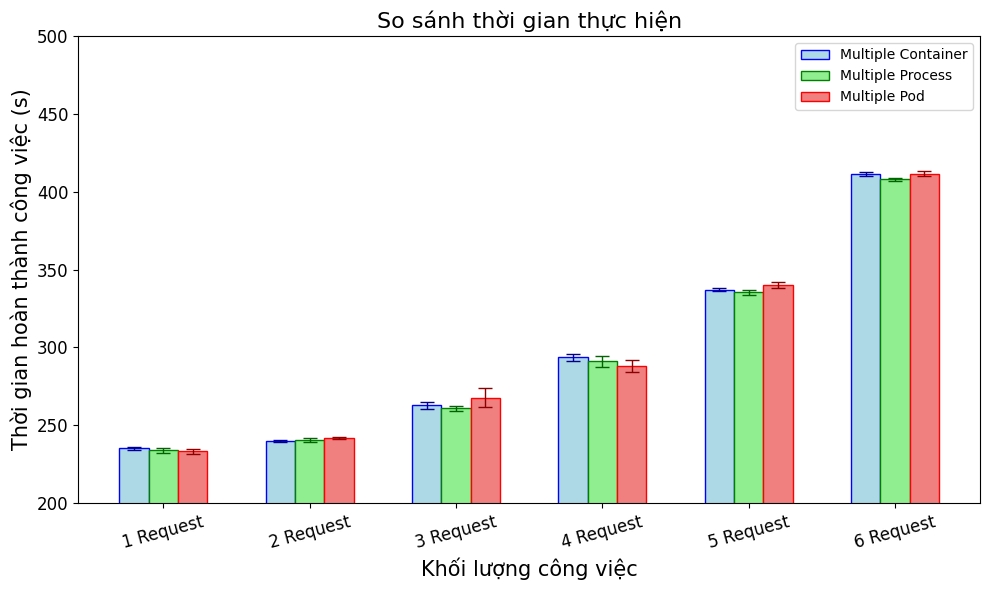

In [30]:
import numpy as np
import matplotlib.pyplot as plt


state = ["1 Request", "2 Request", "3 Request", "4 Request", "5 Request", "6 Request"]
fig, ax = plt.subplots(figsize=(10, 6))
x_pos = np.arange(len(state))

# Convert strings to floats
error_std = [value * z_value for value in std_pod]
error_1_std = [value * z_value for value in std_process]
error_2_std = [value * z_value for value in std_container]

# Plot for data_1
ax.bar(x_pos - 0.2, mean_pod, yerr=error_std, width=0.2, align='center', alpha=1, color='lightblue', edgecolor='blue', capsize=5, label='Multiple Container', error_kw=dict(ecolor='darkblue', lw=1))

# Plot for data_1
ax.bar(x_pos, mean_process, yerr=error_1_std, width=0.2, align='center', alpha=1, color='lightgreen', edgecolor='green', capsize=5, label='Multiple Process', error_kw=dict(ecolor='darkgreen', lw=1))

# Plot for data_2
ax.bar(x_pos + 0.2, mean_container, yerr=error_2_std, width=0.2, align='center', alpha=1, color='lightcoral', edgecolor='red', capsize=5, label='Multiple Pod', error_kw=dict(ecolor='darkred', lw=1))


ax.set_ylabel("Thời gian hoàn thành công việc (s)", fontsize=15)
ax.set_xlabel("Khối lượng công việc", fontsize=15)
ax.set_xticks(x_pos)
ax.set_xticklabels(state, rotation=15, fontsize=12)
ax.set_ylim([200, 500])
ax.legend()
ax.tick_params(axis='both', which='major', labelsize=12)

plt.title("So sánh thời gian thực hiện", fontsize=16)
plt.tight_layout()
plt.show()


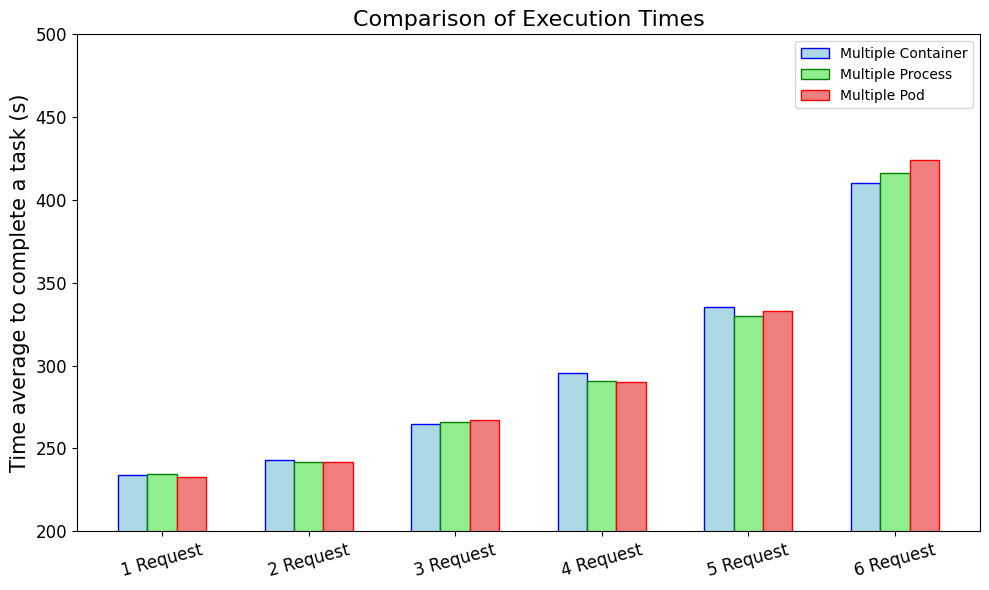

: 

: 

: 

In [8]:
import numpy as np
import matplotlib.pyplot as plt

pod = ['233.02383065223694', '242.02177715301514', '267.33335542678833', '290.2414984703064', '332.69108176231384', '424.0763041973114']
container = ['233.74380058050156', '243.0043317079544', '264.6572044849396', '295.6174919605255', '335.5524945259094', '410.3261868953705']
process = ['234.31508297920226', '241.74236100912094', '265.93165373802185', '290.7530930042267', '329.66557097435', '416.0317521095276']

state = ["1 Request", "2 Request", "3 Request", "4 Request", "5 Request", "6 Request"]
fig, ax = plt.subplots(figsize=(10, 6))
x_pos = np.arange(len(state))

# Convert strings to floats
pod = [float(value) for value in pod]
container = [float(value) for value in container]
process = [float(value) for value in process]

# Plot for data_1
container_bars = ax.bar(x_pos - 0.2, container, width=0.2, align='center', alpha=1, color='lightblue', edgecolor='blue', capsize=8, label='Multiple Container')

# Plot for data_2
process_bars = ax.bar(x_pos, process, width=0.2, align='center', alpha=1, color='lightgreen', edgecolor='green', capsize=8, label='Multiple Process')

# Plot for data (pod at the end)
pod_bars = ax.bar(x_pos + 0.2, pod, width=0.2, align='center', alpha=1, color='lightcoral', edgecolor='red', capsize=8, label='Multiple Pod')

ax.set_ylabel("Time average to complete a task (s)", fontsize=15)
ax.set_xticks(x_pos)
ax.set_xticklabels(state, rotation=15, fontsize=12)
ax.set_ylim([200, 500])
ax.legend()
ax.tick_params(axis='both', which='major', labelsize=12)

plt.title("Comparison of Execution Times", fontsize=16)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd

file_origin = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_6_rep_5_522024_12h19.csv"
file_copy = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_6_rep_{}_522024_12h19.csv"

for i in range(1,5,1):
    file_copy_th = file_copy.format(i)
    
    # Read file
    file_dest = pd.read_csv(file_origin, header=None)
    file_start = pd.read_csv(file_copy_th, header=None)

    merged = pd.concat([file_dest, file_start])
    merged.to_csv(file_origin, index=False, header=False)

In [5]:
time_pod = []
time_pod_error = []
# one_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_1_112024_16h42.csv"

# one_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_8_1512024_5h48.csv"
# two_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_2_rep_10_1512024_6h13.csv"
# third_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_3_rep_10_1512024_6h43.csv" # Default
one_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/giang_2024/time_x86_pod_1_rep_5_522024_6h7.csv"
two_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/giang_2024/time_x86_pod_2_rep_5_522024_6h19.csv"
third_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/giang_2024/time_x86_pod_3_rep_5_522024_6h50.csv"
four_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/giang_2024/time_x86_pod_4_rep_5_522024_7h24.csv"
five_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/giang_2024/time_x86_pod_5_rep_5_522024_7h41.csv"
six_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_6_rep_5_522024_12h19.csv"
file_list = []
file_list.append(one_pod)
file_list.append(two_pod)
file_list.append(third_pod)
file_list.append(four_pod)
file_list.append(five_pod)
file_list.append(six_pod)

for file in file_list:
    with open(file, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        start = []
        end = []
        result = []
        for row in spamreader:
            if row[0] == "cold_to_warm_disk_start":
                start.append(float(row[1]))
            if row[0] == "cold_to_warm_disk_end":
                end.append(float(row[1]))

        for i in range(0, len(start)):
            print(end[i]-start[i])
            result.append(end[i] - start[i])
        print("======")
        time_pod.append(np.mean(result))
        time_pod_error.append((np.std(result))/(np.sqrt(len(result))))

print(time_pod)
print(time_pod_error)

[18.65466332435608, 20.635227155685424, 22.11722264289856, 26.739621448516846, 27.733971881866456, 53.293749237060545]
[1.3743546611305137, 3.1723586388368834, 5.871283431468538, 2.3039399485343646, 1.893912323046685, 11.087068289343058]


In [7]:
import pandas as pd

file_origin = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_5_522024_9h17.csv"
file_copy = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_{}_522024_9h17.csv"

for i in range(1,5,1):
    file_copy_th = file_copy.format(i)
    
    # Read file
    file_dest = pd.read_csv(file_origin, header=None)
    file_start = pd.read_csv(file_copy_th, header=None)

    merged = pd.concat([file_dest, file_start])
    merged.to_csv(file_origin, index=False, header=False)

In [11]:
# Process
time_process = []
time_process_error = []

one_process = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_5_522024_8h19.csv"
two_process = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_5_522024_8h29.csv"
third_process = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_5_522024_8h51.csv"
four_process = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_5_522024_9h0.csv"
five_process = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_5_522024_9h9.csv"
six_process = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_5_522024_9h17.csv"

file_list = []
file_list.append(one_process)
file_list.append(two_process)
file_list.append(third_process)
file_list.append(four_process)
file_list.append(five_process)
file_list.append(six_process)

for file in file_list:
    with open(file, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        start = []
        end = []
        result = []
        for row in spamreader:
            if row[0] == "cold_to_warm_disk_start":
                start.append(float(row[1]))
            if row[0] == "cold_to_warm_disk_end":
                end.append(float(row[1]))

        for i in range(0, len(start)):
            result.append(end[i] - start[i])
            print(end[i]-start[i])
        time_process.append(np.mean(result))
        time_process_error.append((np.std(result))/(np.sqrt(len(result))))
    print("===")
print(time_process)
print(time_process_error)

17.295390605926514
10.801701307296753
16.481804132461548
18.304877042770386
17.288330793380737
===
18.172147035598755
16.507380962371826
16.648022890090942
10.282798767089844
11.418880939483643
===
22.807501316070557
15.488465547561646
10.893994331359863
21.30268359184265
===
18.963512659072876
9.626743078231812
15.366898536682129
18.963512659072876
10.025774955749512
===
16.869789361953735
10.837944507598877
16.09628176689148
11.68580412864685
15.845720529556274
===
18.277991771697998
18.866507291793823
14.911818027496338
17.400830507278442
14.025802850723267
===
[16.034420776367188, 14.605846118927001, 17.62316119670868, 14.589288377761841, 14.267108058929443, 16.696590089797972]
[1.1983123434025766, 1.4049954934444566, 2.3750642063125533, 1.8365714174891468, 1.1141658116043012, 0.8490899198417919]


In [28]:
import pandas as pd

file_origin = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_5_522024_11h25.csv"
file_copy = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_{}_522024_11h25.csv"

for i in range(1,5,1):
    file_copy_th = file_copy.format(i)
    
    # Read file
    file_dest = pd.read_csv(file_origin, header=None)
    file_start = pd.read_csv(file_copy_th, header=None)

    merged = pd.concat([file_dest, file_start])
    merged.to_csv(file_origin, index=False, header=False)

In [30]:
# Container

#time_x86_pod_1_rep_1_522024_9h45.csv
time_container = []
time_container_error = []

one_container = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_5_522024_9h45.csv"
two_container = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_5_522024_9h57.csv"
third_container = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_5_522024_10h10.csv"
four_container = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_5_522024_10h21.csv"
five_container = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_5_522024_10h35.csv"
six_container = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_5_522024_11h25.csv"

file_list = []
file_list.append(one_container)
file_list.append(two_container)
file_list.append(third_container)
file_list.append(four_container)
file_list.append(five_container)
file_list.append(six_container)

for file in file_list:
    with open(file, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        start = []
        end = []
        result = []
        for row in spamreader:
            if row[0] == "cold_to_warm_disk_start":
                start.append(float(row[1]))
            if row[0] == "cold_to_warm_disk_end":
                end.append(float(row[1]))

        for i in range(0, len(start)):
            result.append(end[i] - start[i])
            
            print(end[i] - start[i])

        time_container.append(np.mean(result))
        time_container_error.append((np.std(result))/(np.sqrt(len(result))))
    print("======")

print(time_container)
print(time_container_error)

27.330825328826904
30.864832639694214
21.91821837425232
26.055702209472656
31.853323698043823
30.864832639694214
21.91821837425232
26.055702209472656
31.853323698043823
28.132164239883423
26.0594642162323
30.825153589248657
24.810888528823853
35.54333710670471
26.936225414276123
26.883962869644165
34.91069221496582
29.88179349899292
34.927215576171875
27.941898584365845
86.69905543327332
20.316516160964966
21.09466814994812
29.729576587677002
26.4317045211792
76.32803773880005
32.743367433547974
24.880165815353394
31.12165856361389
27.509040117263794
28.155109167099
82.45376992225647
25.992117881774902
26.629114627838135
[27.634997685750324, 29.074201536178588, 30.70797791481018, 37.15634298324585, 38.3009868144989, 38.14783034324646]
[1.2516469001233572, 1.7095901414849675, 1.6124089135410518, 11.20017922612939, 8.601127339521227, 9.91261171061178]


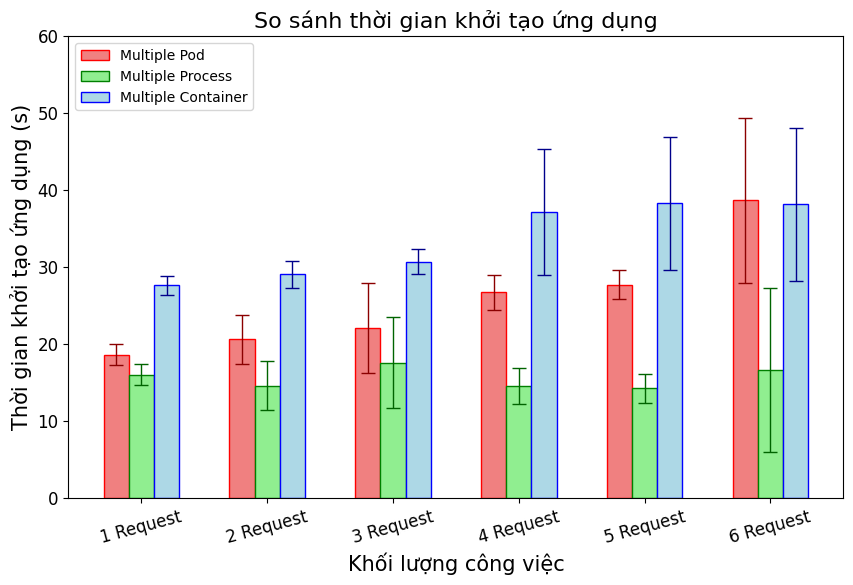

In [35]:
import numpy as np
import matplotlib.pyplot as plt

state = ["1 Request", "2 Request", "3 Request", "4 Request", "5 Request", "6 Request"]
fig, ax = plt.subplots(figsize=(10, 6))

# time_pod = [15.71163592338562, 17.658172726631165, 18.994054794311523] 
# time_pod_error = [0.9550561081978736, 0.46581915293980364, 1.4598083638494865]

# time_process = [15.195673179626464, 15.514394330978394, 15.770310163497925] 
# time_process_error = [0.8782904377430389, 1.0758791035704747, 2.9180390566558887]

# time_container = [25.677671480178834, 27.664137744903563, 38.302348899841306] 
# time_container_error = [1.193181185498802, 2.654529509355404, 8.13764237806102]

time_pod = [18.65466332435608, 20.635227155685424, 22.11722264289856, 26.739621448516846, 27.733971881866456, 38.66682476997376]
time_pod_error = [1.3743546611305137, 3.1723586388368834, 5.871283431468538, 2.3039399485343646, 1.893912323046685, 10.666226890100758]

time_process = [16.034420776367188, 14.605846118927001, 17.62316119670868, 14.589288377761841, 14.267108058929443, 16.696590089797972]
time_process_error = [1.1983123434025766, 1.4049954934444566, 2.3750642063125533, 1.8365714174891468, 1.1141658116043012, 0.8490899198417919]

time_container = [27.634997685750324, 29.074201536178588, 30.70797791481018, 37.15634298324585, 38.3009868144989, 38.14783034324646]
time_container_error = [1.2516469001233572, 1.7095901414849675, 1.6124089135410518, 8.20017922612939, 8.601127339521227, 9.91261171061178]



# Plot for data
x_pos = np.arange(len(state))
ax.bar(x_pos - 0.2, time_pod, yerr=time_pod_error, width=0.2, align='center', alpha=1, color='lightcoral', edgecolor='red', capsize=5, label='Multiple Pod', error_kw=dict(ecolor='darkred', lw=1))

# Plot for data_1
ax.bar(x_pos, time_process, yerr=time_pod_error, width=0.2, align='center', alpha=1, color='lightgreen', edgecolor='green', capsize=5, label='Multiple Process', error_kw=dict(ecolor='darkgreen', lw=1))

# Plot for data_2
ax.bar(x_pos + 0.2, time_container, yerr=time_container_error, width=0.2, align='center', alpha=1, color='lightblue', edgecolor='blue', capsize=5, label='Multiple Container', error_kw=dict(ecolor='darkblue', lw=1))

ax.set_ylabel("Thời gian khởi tạo ứng dụng (s)", fontsize=15)
ax.set_xlabel("Khối lượng công việc", fontsize=15)
ax.set_xticks(x_pos)
ax.set_xticklabels(state, rotation=15, fontsize=12)
ax.set_ylim([0, 60])

# Chuyển legend sang góc bên trái
ax.legend(loc='upper left', bbox_to_anchor=(0, 1))

ax.tick_params(axis='both', which='major', labelsize=12)
plt.title("So sánh thời gian khởi tạo ứng dụng", fontsize=16)

plt.show()


In [21]:
import math

pod = [3.0201525951614903, 1.4730495010200988, 4.6163193771281845]
process = [2.777398230414319, 3.4022284542628944, 9.227649720361729]
container = [3.7731702074360847, 8.394359365692324, 25.73348469858185]

def std_error(data):
    n = len(data)
    for i in range(n):
        data[i] = float(data[i]) / (math.sqrt(10))
    return data

pod = std_error(pod)
process = std_error(process)
container = std_error(container)

print(pod)
print(process)
print(container)


[0.9550561081978736, 0.46581915293980364, 1.4598083638494865]
[0.8782904377430389, 1.0758791035704747, 2.9180390566558887]
[1.193181185498802, 2.654529509355404, 8.13764237806102]


/tmp/ipykernel_831301/1875865289.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), rotation = 15)
/tmp/ipykernel_831301/1875865289.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(state, fontsize = 14)


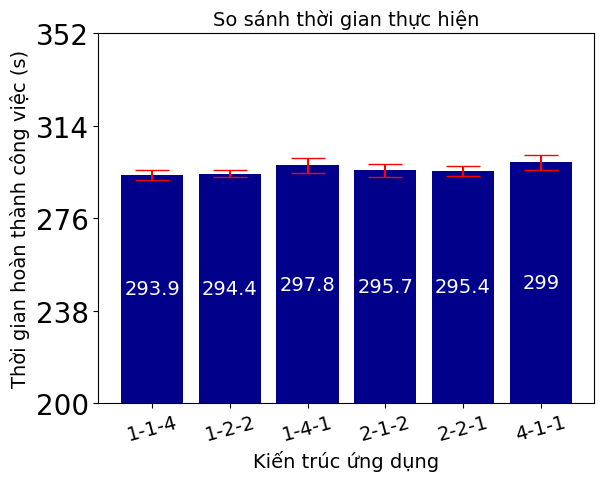

In [127]:
import numpy as np
import matplotlib.pyplot as plt

case_1 = [296.1207449436188, 292.0035343170166, 292.3368456363678, 289.7879481315613, 298.39885663986206, 294.7421450614929]
case_2 = [293.72584795951843, 294.5193040370941, 295.72132539749146, 296.93589663505554, 291.07134103775024]
case_3 = [294.4745121002197, 292.4354145526886, 298.8372473716736, 305.1067838668823, 298.24094319343567]
case_4 = [293.88469552993774, 292.1930208206177, 292.72515511512756, 301.6736454963684, 297.9839115142822]
case_5 = [298.53509187698364, 293.6064016819, 296.45940017700195, 291.24686336517334, 297.1617383956909]
case_6 = [296.6427733898163, 296.458283662796, 298.25095415115356, 296.2518563270569, 307.3032202720642]

cases = [case_1, case_2, case_3, case_4, case_5, case_6]

means = [round(np.mean(case), 1) for case in cases]
stds = [round((np.std(case))/(np.sqrt(len(case))), 1) for case in cases]
std_error = [value * z_value for value in stds]

state = ["1-1-4", "1-2-2", "1-4-1", "2-1-2", "2-2-1", "4-1-1"]
fig1, ax1 = plt.subplots()
x_pos = np.arange(len(state))

bars = ax1.bar(x_pos, means, yerr=std_error, align='center', alpha=0.9, ecolor='red', capsize=12, color="darkblue")

# case_1_final = [round(value, 2) for value in case_1]


bars= ax1.bar(state, means, color="darkblue")
ax1.bar_label(bars, label_type='center', color="w", fontsize=14)
ax1.set_ylabel("Thời gian hoàn thành công việc (s)", fontsize=14)
ax1.set_xlabel("Kiến trúc ứng dụng", fontsize=14)

ax1.set_xticklabels(ax1.get_xticks(), rotation = 15)

ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.set_xticklabels(state, fontsize = 14)
# ax1.set_yticklabels(ax1.get_yticks()+10, fontsize=13)
ax1.set_ylim(200, 352)
plt.title("So sánh thời gian thực hiện", fontsize=14)
#Chỉ định các giá trị mốc trên trục tung
num_y_ticks = 5
y_step = round((352 - 200) / (num_y_ticks - 1))
y_ticks = np.arange(200, 353, y_step)
ax1.set_yticks(y_ticks)

plt.savefig('../pdf/power-states.pdf', bbox_inches='tight')
plt.show()





/tmp/ipykernel_831301/812780682.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), rotation = 15)
/tmp/ipykernel_831301/812780682.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(state, fontsize = 14)


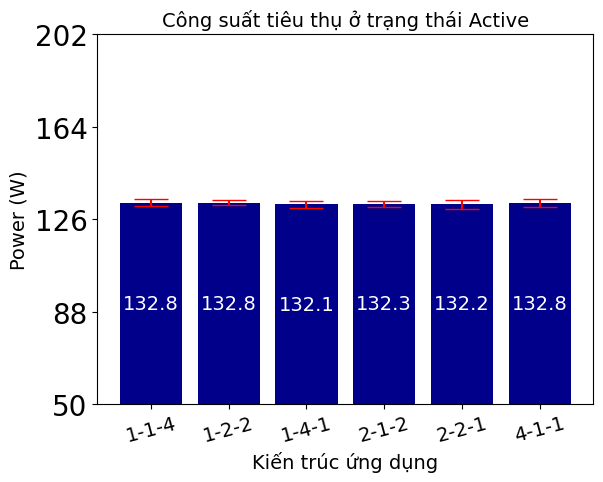

In [116]:
import numpy as np
import matplotlib.pyplot as plt

case_1 = [132.8, 132.84, 132.09, 132.33, 132.21, 132.75]
std = [1.4354669680397418, 1.1631186709730372, 1.4030090175206742, 1.166925511695247, 1.8170811361971597, 1.6081426498488085]
# case_2 = [293.72584795951843, 294.5193040370941, 295.72132539749146, 296.93589663505554, 291.07134103775024]
# case_3 = [294.4745121002197, 292.4354145526886, 298.8372473716736, 305.1067838668823, 298.24094319343567]
# case_4 = [293.88469552993774, 292.1930208206177, 292.72515511512756, 301.6736454963684, 297.9839115142822]
# case_5 = [298.53509187698364, 293.6064016819, 296.45940017700195, 291.24686336517334, 297.1617383956909]
# case_6 = [296.6427733898163, 296.458283662796, 298.25095415115356, 296.2518563270569, 307.3032202720642]
state = ["1-1-4", "1-2-2", "1-4-1", "2-1-2", "2-2-1", "4-1-1"]
fig1, ax1 = plt.subplots()
x_pos = np.arange(len(state))

bars = ax1.bar(x_pos, case_1, yerr=std, align='center', alpha=0.9, ecolor='red', capsize=12, color="darkblue")

case_1_final = [round(value, 1) for value in case_1]


bars= ax1.bar(state, case_1_final, color="darkblue")
ax1.bar_label(bars, label_type='center', color="w", fontsize=14)
ax1.set_ylabel("Power (W)", fontsize=14)
ax1.set_xlabel("Kiến trúc ứng dụng", fontsize=14)

ax1.set_xticklabels(ax1.get_xticks(), rotation = 15)

ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.set_xticklabels(state, fontsize = 14)
# ax1.set_yticklabels(ax1.get_yticks()+10, fontsize=13)
ax1.set_ylim(50, 200)
plt.title("Công suất tiêu thụ ở trạng thái Active", fontsize=14)
#Chỉ định các giá trị mốc trên trục tung
num_y_ticks = 5
y_step = round((200 - 50) / (num_y_ticks - 1))
y_ticks = np.arange(50, 210, y_step)
ax1.set_yticks(y_ticks)

plt.savefig('../pdf/power-states.pdf', bbox_inches='tight')
plt.show()



/tmp/ipykernel_831301/2679910879.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), rotation = 15)
/tmp/ipykernel_831301/2679910879.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(state, fontsize = 14)


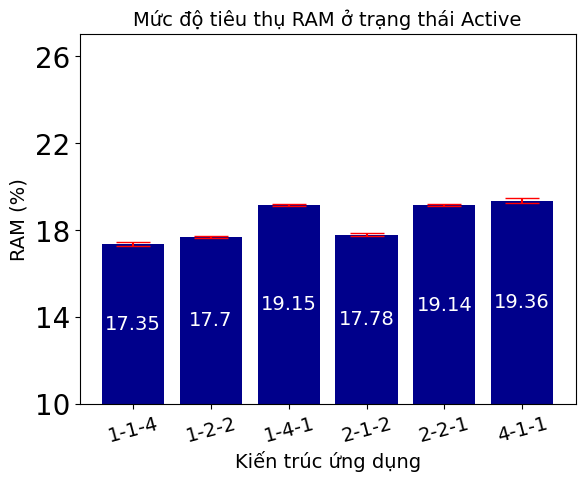

In [112]:
import numpy as np
import matplotlib.pyplot as plt

case_1 = [17.35, 17.7, 19.15, 17.78, 19.14, 19.36]
std = [0.08996893818675211, 0.043970522666741015, 0.05565022477496893, 0.06669200424894235, 0.04911549450485394, 0.11300868898313676]
# case_2 = [293.72584795951843, 294.5193040370941, 295.72132539749146, 296.93589663505554, 291.07134103775024]
# case_3 = [294.4745121002197, 292.4354145526886, 298.8372473716736, 305.1067838668823, 298.24094319343567]
# case_4 = [293.88469552993774, 292.1930208206177, 292.72515511512756, 301.6736454963684, 297.9839115142822]
# case_5 = [298.53509187698364, 293.6064016819, 296.45940017700195, 291.24686336517334, 297.1617383956909]
# case_6 = [296.6427733898163, 296.458283662796, 298.25095415115356, 296.2518563270569, 307.3032202720642]
state = ["1-1-4", "1-2-2", "1-4-1", "2-1-2", "2-2-1", "4-1-1"]
fig1, ax1 = plt.subplots()
x_pos = np.arange(len(state))

bars = ax1.bar(x_pos, case_1, yerr=std, align='center', alpha=0.9, ecolor='red', capsize=12, color="darkblue")

case_1_final = [round(value, 2) for value in case_1]


bars= ax1.bar(state, case_1, color="darkblue")
ax1.bar_label(bars, label_type='center', color="w", fontsize=14)
ax1.set_ylabel("RAM (%)", fontsize=14)
ax1.set_xlabel("Kiến trúc ứng dụng", fontsize=14)

ax1.set_xticklabels(ax1.get_xticks(), rotation = 15)

ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.set_xticklabels(state, fontsize = 14)
# ax1.set_yticklabels(ax1.get_yticks()+10, fontsize=13)
ax1.set_ylim(10, 27)
plt.title("Mức độ tiêu thụ RAM ở trạng thái Active", fontsize=14)
#Chỉ định các giá trị mốc trên trục tung
num_y_ticks = 5
y_step = round((27 - 10) / (num_y_ticks - 1))
y_ticks = np.arange(10, 27, y_step)
ax1.set_yticks(y_ticks)

plt.savefig('../pdf/power-states.pdf', bbox_inches='tight')
plt.show()


In [ ]:
import matplotlib.pyplot as plot
import csv
import numpy as np
import random
import scipy

confidence_level = 0.90
z_value = scipy.stats.norm.ppf((1 + confidence_level) / 2)

In [ ]:
import pandas as pd

file_origin = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_2_rep_10_1612024_5h52.csv"
file_copy = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_2_rep_{}_1612024_5h52.csv"

for i in range(1,10,1):
    file_copy_th = file_copy.format(i)
    
    # Read file
    file_dest = pd.read_csv(file_origin, header=None)
    file_start = pd.read_csv(file_copy_th, header=None)

    merged = pd.concat([file_dest, file_start])
    merged.to_csv(file_origin, index=False, header=False)

In [ ]:
time_pod = []
time_pod_error = []
# one_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_1_112024_16h42.csv"

one_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_2_rep_10_1612024_5h52.csv"
## Default

file_list = []
file_list.append(one_pod)
# file_list.append(two_pod)
# file_list.append(third_pod)

for file in file_list:
    with open(file, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        start = []
        end = []
        result = []
        for row in spamreader:
            if row[0] == "cold_to_warm_disk_start":
                start.append(float(row[1]))
            if row[0] == "cold_to_warm_disk_end":
                end.append(float(row[1]))

        for i in range(0, len(start)):
            result.append(end[i] - start[i])
            print(end[i] - start[i])
        time_pod.append(np.mean(result))
        time_pod_error.append((np.std(result))/(np.sqrt(len(result))))

print(time_pod)
print(time_pod_error)

28.94204545021057
29.4097797870636
32.04386639595032
27.959795475006104
37.61767578125
26.56112766265869
32.79436779022217
28.005961418151855
46.05960965156555
36.086199045181274
[32.548042845726016]
[1.7929713274139416]


In [ ]:
time_pod = []
time_pod_error = []
# one_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_1_112024_16h42.csv"

one_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/temp/time_x86_pod_1_rep_10_1512024_9h21.csv"
two_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_10_1512024_18h0.csv"
third_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/time_x86_pod_1_rep_10_1512024_17h20.csv" # Default
four_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/temp/time_x86_pod_2_rep_10_1512024_11h57.csv"
five_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/temp/time_x86_pod_2_rep_10_1512024_12h20.csv"
six_pod = "/home/kien/kiem/serverless-giang/data/timestamp/mec/temp/time_x86_pod_4_rep_10_1512024_12h45.csv" # Default

file_list = []
file_list.append(one_pod)
file_list.append(two_pod)
file_list.append(third_pod)
file_list.append(four_pod)
file_list.append(five_pod)
file_list.append(six_pod)

for file in file_list:
    with open(file, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        start = []
        end = []
        result = []
        for row in spamreader:
            if row[0] == "cold_to_warm_disk_start":
                start.append(float(row[1]))
            if row[0] == "cold_to_warm_disk_end":
                end.append(float(row[1]))

        for i in range(0, len(start)):
            
            result.append(end[i] - start[i])
            print(end[i] - start[i])
        print("Start")
        
        time_pod.append(np.mean(result))
        time_pod_error.append((np.std(result))/(np.sqrt(len(result))))

print(time_pod)
print(time_pod_error)

25.6861891746521
33.64192485809326
20.496340036392212
20.44386315345764
35.58311128616333
18.864710807800293
30.610395431518555
27.309975385665894
24.562766313552856
19.743309259414673
Start
26.105443477630615
38.38327383995056
26.386268377304077
21.33474326133728
34.8448805809021
20.905194520950317
24.904616594314575
26.370030641555786
32.168999433517456
20.606566429138184
Start
27.099143743515015
22.198935747146606
34.20035696029663
20.728424310684204
32.47235631942749
98.43998551368713
75.30779337882996
29.94477677345276
26.55135989189148
25.35195517539978
Start
28.329527139663696
21.853869676589966
22.905957221984863
24.871181964874268
27.137858629226685
29.24210500717163
37.31719493865967
27.949630737304688
28.143977880477905
28.933271884918213
Start
31.377546787261963
33.008867025375366
39.38726544380188
23.415079593658447
22.299469470977783
32.22790765762329
26.58214497566223
28.784873723983765
27.86669158935547
22.05311131477356
Start
30.188332557678223
33.25952196121216
37.311

/tmp/ipykernel_831301/3746178930.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), rotation = 15)
/tmp/ipykernel_831301/3746178930.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(state, fontsize = 14)


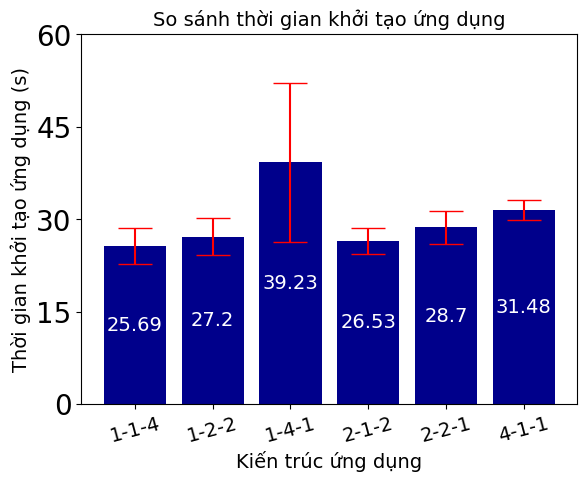

In [120]:
#Spawning time in states
data = [25.69425857067108, 27.201001715660095, 39.229508781433104, 26.528457508087158, 28.700295758247375, 31.480855321884157]
error = [1.804593082180602, 1.8262469283858898, 7.808635702876152, 1.27480811572075, 1.645188701581378, 0.9989256133638676]

state = ["1-1-4", "1-2-2", "1-4-1", "2-1-2", "2-2-1", "4-1-1"]
# state = ["$S_n$", "$S_c$", "$S_{wd}$", "$S_{wc}$", "$S_{wm}$",  "$S_a$"]
fig1, ax1 = plot.subplots()
x_pos = x_pos = np.arange(len(state))

error_std = [value*z_value for value in error]
ax1.bar(x_pos, data, yerr=error_std, align='center', alpha=0.9, ecolor='red', capsize=12)
# ax1.set_title('Average power usage of states')
data_round = [round(x, 2) for x in data]

bars= ax1.bar(state, data_round, color="darkblue")
ax1.bar_label(bars, label_type='center',color="w", fontsize = 14)
ax1.set_ylabel("Thời gian khởi tạo ứng dụng (s)", fontsize = 14)
ax1.set_xlabel("Kiến trúc ứng dụng", fontsize = 14)
# ax1.set_xlabel("State ($S$)", fontsize = 15)
# ax1.set_xticks(rotation=15)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 15)
plt.title("So sánh thời gian khởi tạo ứng dụng", fontsize=14)
# ax1.set_xticks(x_pos)
# ax1.set_yticks(fontsize = 13)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.set_xticklabels(state, fontsize = 14)
ax1.set_ylim(0,60)

num_y_ticks = 5
y_step = round((60 - 0) / (num_y_ticks - 1))
y_ticks = np.arange(0, 62, y_step)
ax1.set_yticks(y_ticks)
plot.savefig('../pdf/power-states.pdf', bbox_inches='tight')
plot.show()

/tmp/ipykernel_3555515/2284381832.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks(), rotation = 15)
/tmp/ipykernel_3555515/2284381832.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(state, fontsize = 12)


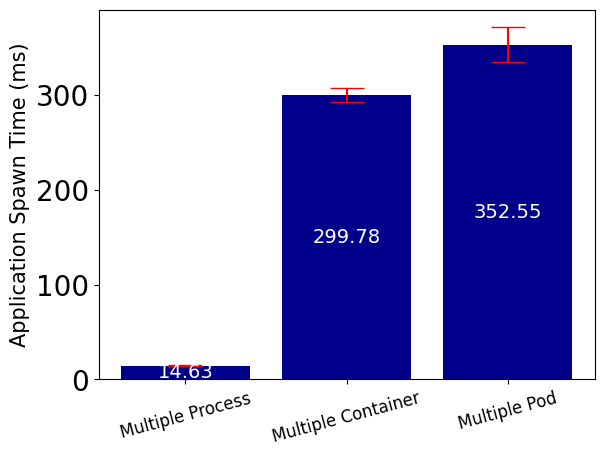

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plot

confidence_level = 0.90
z_value = scipy.stats.norm.ppf((1 + confidence_level) / 2)
#Spawning time in states

data = []
std = []
data_1 = [0.3950619697570801, 0.32903337478637695, 0.34078550338745117, 0.3318290710449219, 0.3660447597503662] # multiple_pod
data_2 = [0.3154313564300537, 0.28838062286376953,  0.30279111862182617, 0.3042752742767334, 0.28802990913391113] # multiple_container
data_3 = [0.014314651489257812, 0.01445770263671875, 0.01424551010131836, 0.01628875732421875, 0.01384735107421875] # multiple_process

data.append(np.average(data_3))
data.append(np.average(data_2))
data.append(np.average(data_1))

std.append(np.std(data_3) / np.sqrt(len(data_3)))
std.append(np.std(data_2) / np.sqrt(len(data_2)))
std.append(np.std(data_1) / np.sqrt(len(data_1)))


data_av = [value*1000 for value in data]
error_std = [value*z_value*1000 for value in std]



state = ["Multiple Process", "Multiple Container", "Multiple Pod"]
# state = ["$S_n$", "$S_c$", "$S_{wd}$", "$S_{wc}$", "$S_{wm}$",  "$S_a$"]
fig1, ax1 = plot.subplots()
x_pos = x_pos = np.arange(len(state))


ax1.bar(x_pos, data_av, yerr=error_std, align='center', alpha=0.9, ecolor='red', capsize=12)
# ax1.set_title('Average power usage of states')
data_round = [round(x, 2) for x in data_av]

bars= ax1.bar(state, data_round, color="darkblue")
ax1.bar_label(bars, label_type='center',color="w", fontsize = 14)
ax1.set_ylabel("Application Spawn Time (ms)", fontsize = 15)
# ax1.set_xlabel("State ($S$)", fontsize = 15)
# ax1.set_xticks(rotation=15)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 15)
# ax1.set_xticks(x_pos)
# ax1.set_yticks(fontsize = 13)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.set_xticklabels(state, fontsize = 12)
# ax1.set_ylim(0,80)
plot.savefig('../pdf/power-states.pdf', bbox_inches='tight')
plot.show()